In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
df = pd.read_csv(r"F:/Python Projects/Car_sales.csv")

In [5]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [6]:
# Identify the variable types in the given data set.
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

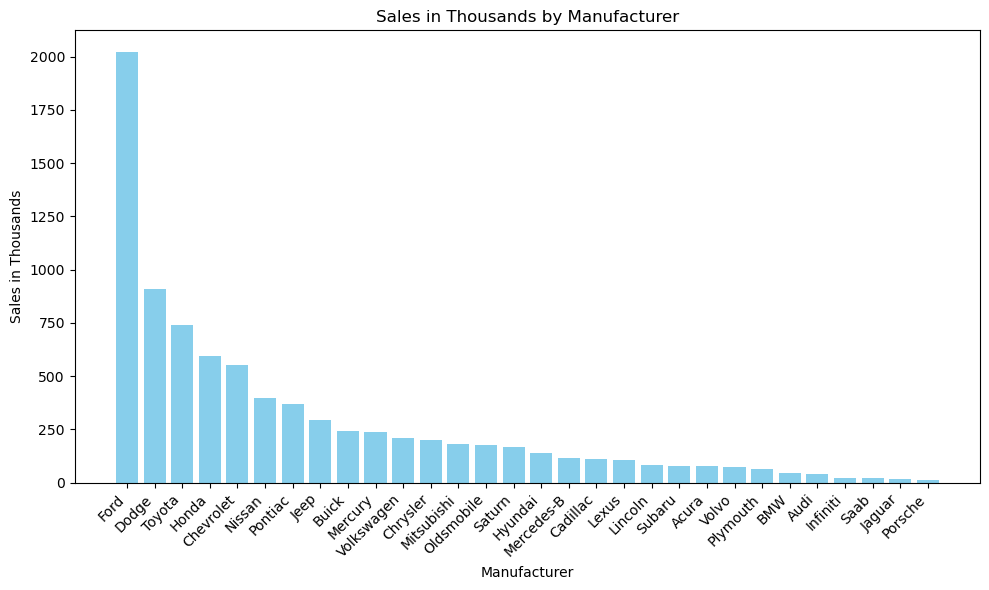

In [7]:
# Make a bar graph for manufacturer type.

# Selecting 'Manufacturer' and 'Sales_in_thousands' columns
df_subset = df[['Manufacturer', 'Sales_in_thousands']]

# Grouping by Manufacturer and summing the Sales_in_thousands
df_grouped = df_subset.groupby('Manufacturer').sum()

# Sorting the values for better visualization
df_grouped = df_grouped.sort_values(by='Sales_in_thousands', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped['Sales_in_thousands'], color='skyblue')
plt.xlabel('Manufacturer')
plt.ylabel('Sales in Thousands')
plt.title('Sales in Thousands by Manufacturer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

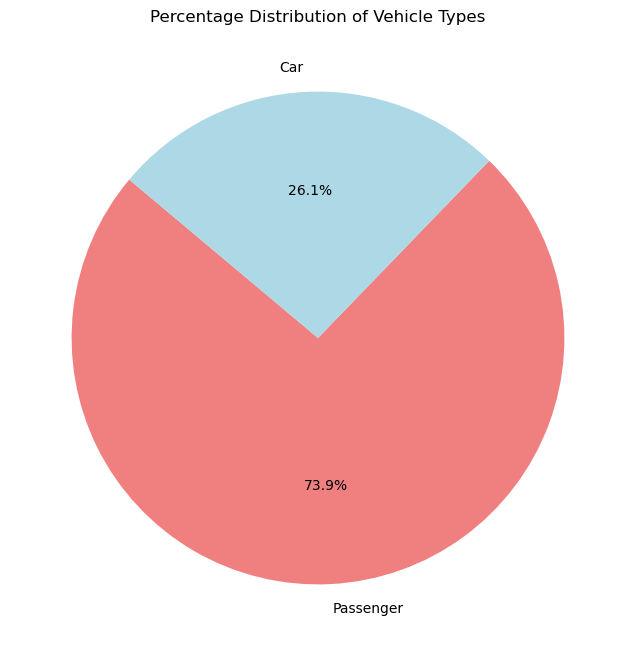

In [8]:
# Make a pie chart for showing vehicle type by percentage

# Selecting 'Vehicle_type' column
df_subset = df['Vehicle_type']

# Counting the occurrences of each vehicle type
vehicle_type_counts = df_subset.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Percentage Distribution of Vehicle Types')
plt.show()

In [9]:
# Selecting the 'Price_in_thousands' column
price_column = df['Price_in_thousands']

# Calculating the mean (average) price
average_price = price_column.mean()

print(f"The average price of all cars is: ${average_price:.2f}")

The average price of all cars is: $27.39


In [10]:
# Calculate the variance and standard deviation for numerical columns 
# such as Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower


# Selecting the relevant numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculating variance and standard deviation for each numerical column
variance_values = df[numerical_columns].var()
std_deviation_values = df[numerical_columns].std()

# Displaying the results
print("Variance:")
print(variance_values)

print("\nStandard Deviation:")
print(std_deviation_values)

Variance:
Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
dtype: float64

Standard Deviation:
Sales_in_thousands     68.029422
__year_resale_value    11.453384
Price_in_thousands     14.351653
Engine_size             1.044653
Horsepower             56.700321
dtype: float64


In [11]:
# For the same columns Calculate IQR and identify outliers in these columns

# Selecting the relevant numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculate IQR and identify outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

    # Displaying results for each column
    print(f"\nOutliers in {column}:")
    print(outliers)


Outliers in Sales_in_thousands:
    Manufacturer           Model  Sales_in_thousands  __year_resale_value  \
40         Dodge      Ram Pickup             227.061               15.060   
45         Dodge         Caravan             181.749               12.025   
49          Ford          Taurus             245.815               10.055   
50          Ford           Focus             175.670                  NaN   
52          Ford        Explorer             276.747               16.640   
53          Ford        Windstar             155.787               13.175   
55          Ford          Ranger             220.650                7.850   
56          Ford        F-Series             540.561               15.075   
57         Honda           Civic             199.685                9.850   
58         Honda          Accord             230.902               13.210   
69          Jeep  Grand Cherokee             157.040               18.810   
137       Toyota           Camry           

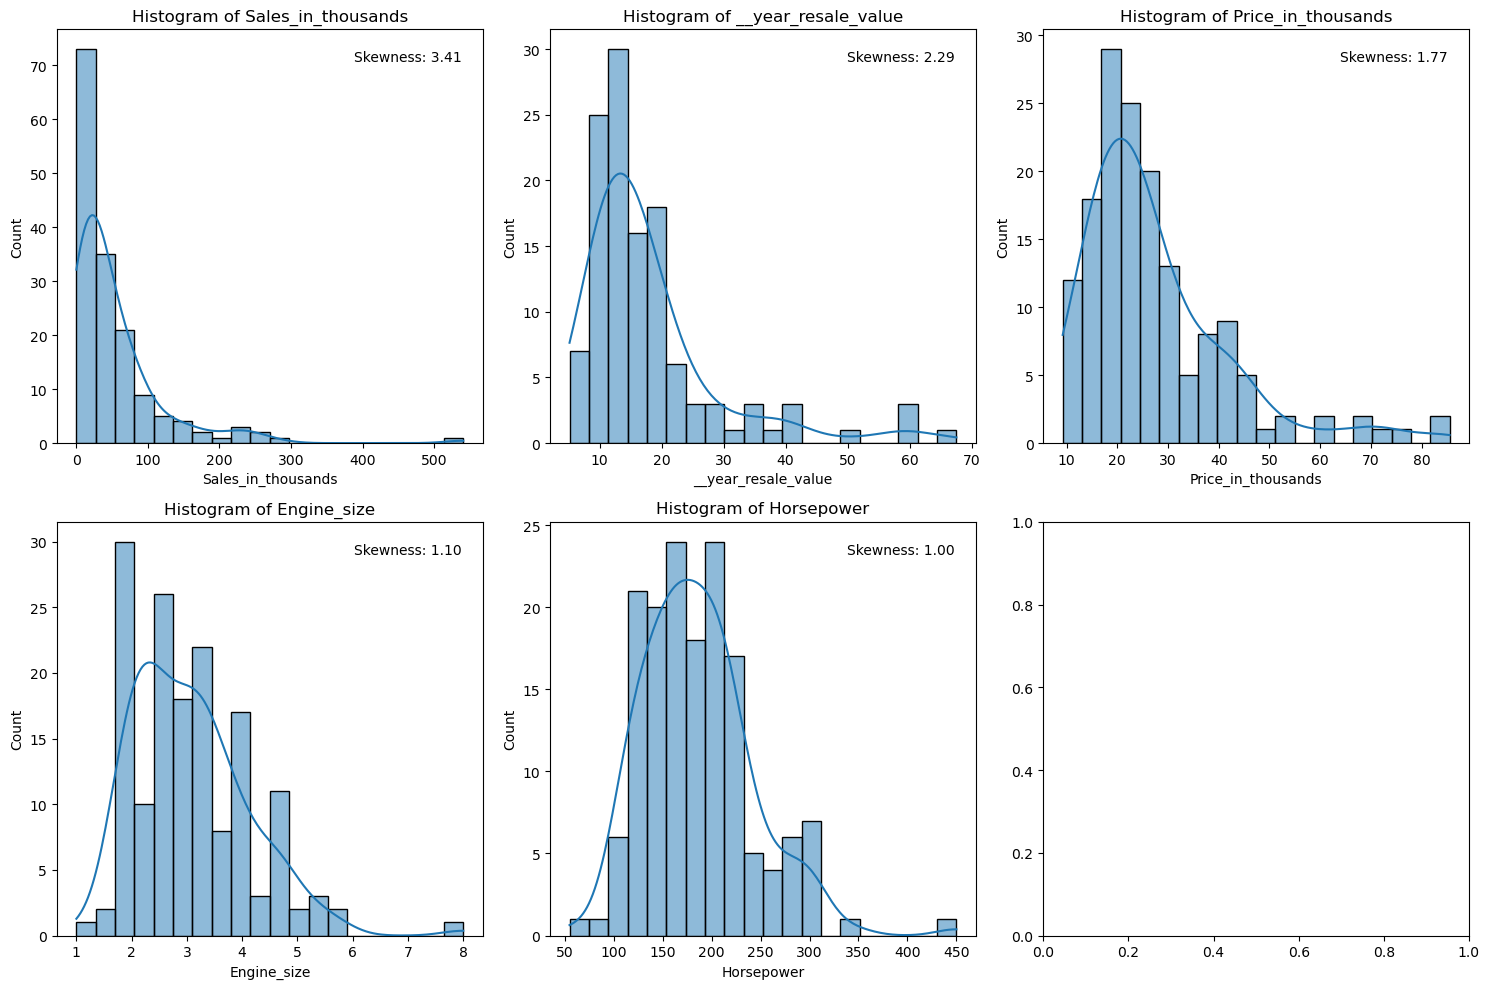

In [12]:
#Make Histograms for all Numerical columns and identify the distribution of type by calculating skewness; 

import seaborn as sns

# Selecting the relevant numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create histograms and calculate skewness for each numerical column
for i, column in enumerate(numerical_columns):
    # Plotting histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

    # Calculating skewness
    skewness = df[column].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=axes[i].transAxes, ha='right', va='top')

# Adjust layout
plt.tight_layout()
plt.show()